In [1]:
import numpy as np
import math
import bisect
from scipy.stats import norm
import scipy as sp
import matplotlib.pyplot as plt

# TODO 1: Univariate Estimation

In [2]:
L = 10000
width = 0.1
test = np.random.normal(0,1, (L,1))
print(test)

[[ 1.46756636]
 [-0.11064412]
 [ 0.37237998]
 ...
 [ 1.26070733]
 [ 1.36347174]
 [ 0.54890348]]


In [3]:
def pdf(x : np.ndarray, width : float) -> tuple:
    '''
    Function that estimates the pdf of a vector x, using an histogram with bins of
    width specified by the corresponding argument.
    The function returns a tuple containing hist and bin_edges (see np.histogram).
    If plot=True the function also plots the pdf histogram.
    '''
    x_min = x.min() # Min value taken by x
    x_max = x.max() # Max value taken by x
    # Create vector of bin_edges
    bin_edges = np.arange(x_min, x_max+0.01, step=width)
    hist, bin_edges = np.histogram(x, bins=bin_edges, density=True)
    
    return hist, bin_edges

In [4]:
hist, _ = pdf(test, width)
print(hist.sum())

9.999999999999993


In [5]:
def diff_info(x : np.ndarray, width : float) -> np.ndarray:
    '''
    Function that estimates the differential information function of the continous r.v. x.
    Since we are working with empirical discrete vectors.
    '''
    # Compute pdf
    hist, _ = pdf(x, width)
    hist = np.array(hist[hist != 0]) # Drop probs = 0, which would deform the result.
    diff_info = np.log2(1/hist)
    return diff_info

In [6]:
print(diff_info(test, width))

[9.96564001 8.96564001 8.96564001 8.96564001 8.96564001 9.96564001
 6.96564001 7.96564001 7.15828509 5.96564001 5.96564001 5.64371191
 5.10765901 4.79571501 4.57332259 4.32178382 4.05874941 3.94327219
 3.50620839 3.35093016 2.97695532 2.73682132 2.78573092 2.53937525
 2.19745568 2.05874941 2.07689676 1.91579146 1.8415187  1.74163833
 1.51855678 1.45388735 1.40721929 1.3957844  1.37318297 1.26867248
 1.44207805 1.30386191 1.26520029 1.4264812  1.48585974 1.67101926
 1.55201208 1.6213441  1.87817717 1.97128657 2.01727278 2.29321467
 2.38067751 2.41105116 2.78573092 3.12014996 3.27913948 3.44207805
 4.0114437  4.03490267 4.13274999 4.53937525 5.0114437  5.79571501
 5.87817717 6.79571501 6.50620839 8.38067751 7.15828509 7.64371191
 7.64371191 8.96564001 9.96564001 9.96564001 9.96564001 9.96564001]


In [7]:
def diff_entropy(x, width, plot=False, num_bins=False) -> float:
    '''
    Function that computes the differential entropy, using the quantities computed above.
    Note that the final result must be normalized (*width).
    '''
    hist, bin_edges = pdf(x, width)
    # optional plot part
    if plot == True:
        plt.hist(x, bin_edges, density=True)
        plt.plot(bin_edges[:-1]+width/2,hist, color='r') # Note I shifted bin_edges in order to make the red line pass through the center of each bin
    hist = np.array(hist[hist != 0])
    diff_i = diff_info(x, width)
    
    # Now the diff entropy is given as an inner product between px and diff_i
    diff_entropy = np.inner(hist, diff_i) * width
#     print(f'The used width is {width}, the number of bins is therefore {len(hist)}')
    
    if num_bins == True:
        return diff_entropy, len(hist)
    
    return diff_entropy

2.0377503801005203
4.307996400847877
-0.15116310171985445


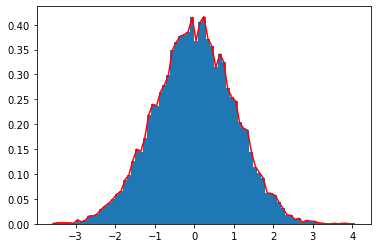

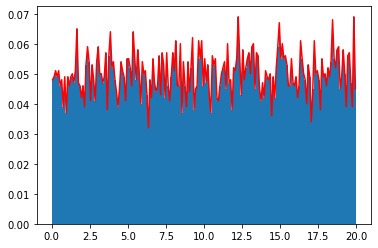

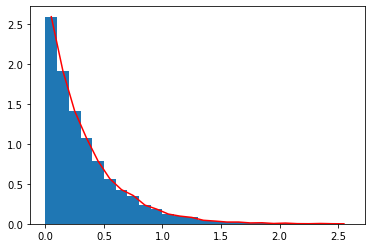

In [8]:
print(diff_entropy(test,width,plot=True))
unif_test = np.random.uniform(0,20.01, (L,1))
# print(unif_test)
plt.figure()
print(diff_entropy(unif_test,width,plot=True))
plt.figure()
exp_test = np.random.exponential(0.33333333, (L,1))
print(diff_entropy(exp_test,width,plot=True))

# TODO 2: Tests Univariate

In [9]:
def gen_uniform(A:float, L:int):
    x = np.random.uniform(0, A, (L,1))
    return x

def gen_norm(var:float, L:int):
    x = np.random.normal(0, var, (L,1))
    return x

def gen_exp(lam:float, L:int):
    beta = 1/lam
    x = np.random.exponential(beta, (L,1))
    return x

In [10]:
def true_diff_uniform(A:float):
    return np.log2(A)

def true_diff_norm(var:float):
    hx = (1/2)*np.log2(2*math.pi*math.e*(var**2))
    return hx

def true_diff_exp(lam:float):
    nat = 1 - np.log(lam)
    bit = nat/np.log(2)
    return bit

## 2.1 Uniform
### 2.1.1 Varying A

<Figure size 432x288 with 0 Axes>

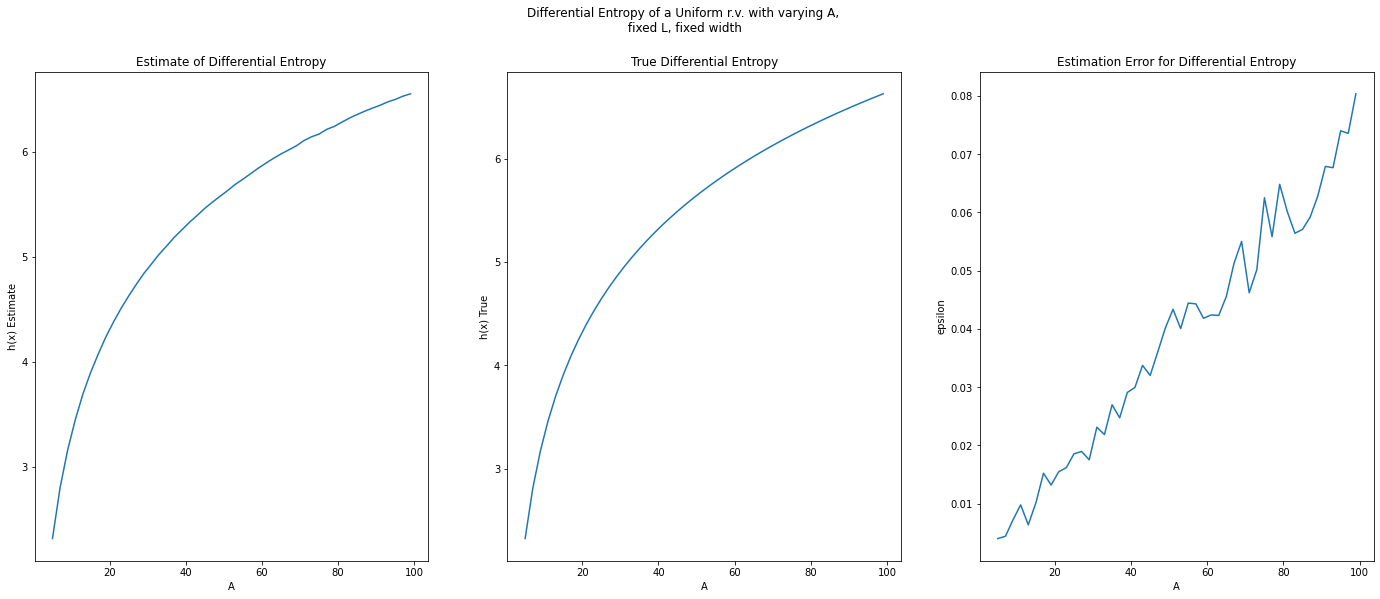

In [11]:
rv = 'Uniform'
varying = 'A'
fix1 = 'L'
fix2 = 'width'
A_grid = np.arange(5,100,2)
L = 10000
width = 0.1

hx_hat_list = []
hx_true = []
error = []

for A in A_grid: #####
    # Empirical Vector
    x = gen_uniform(A, L) #####
    # Estimates
    estimate = diff_entropy(x, width, plot=False)
    
    hx_hat_list.append(estimate)
    #True
    true = true_diff_uniform(A) #####
    hx_true.append(true)
    # Error
    error.append(np.absolute(estimate-true))
    
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}')
# Estimate
ax1.plot(A_grid, hx_hat_list) #####
ax1.set(xlabel=varying, ylabel='h(x) Estimate')
ax1.set_title('Estimate of Differential Entropy')
# True
ax2.plot(A_grid, hx_true) #####
ax2.set(xlabel=varying, ylabel='h(x) True')
ax2.set_title('True Differential Entropy')
# Error
ax3.plot(A_grid, error) #####
ax3.set(xlabel=varying, ylabel='epsilon')
ax3.set_title('Estimation Error for Differential Entropy')

fig.set_figheight(9)
fig.set_figwidth(24)

### 2.1.2 Varying L

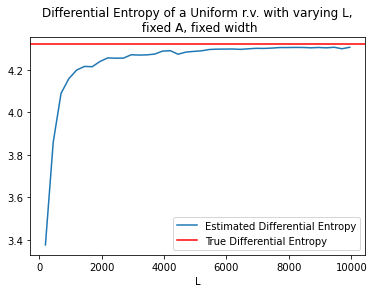

In [12]:
rv = 'Uniform'
varying = 'L'
fix1 = 'A'
fix2 = 'width'
L_grid = np.arange(200,10000,250)
A = 20
width = 0.1

hx_hat_list = []
hx_true = true_diff_uniform(A)
error = []

for L in L_grid: #####
    # Empirical Vector
    x = gen_uniform(A, L) #####
    # Estimates
    estimate = diff_entropy(x, width, plot=False)
    hx_hat_list.append(estimate)
    # Error
    error.append(np.absolute(estimate-hx_true))
    
plt.figure()
# Estimate vs True
title = f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}'
plt.title(title)
plt.plot(L_grid, hx_hat_list, label='Estimated Differential Entropy') #####
plt.axhline(y=hx_true, color='r', label='True Differential Entropy')
plt.xlabel(varying)
plt.legend()

### 2.1.3 Varying the width (and hence the number N of bins)

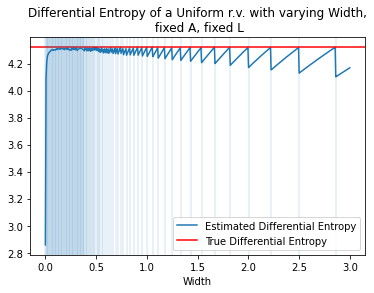

In [13]:
rv = 'Uniform'
varying = 'Width'
fix1 = 'A'
fix2 = 'L'
w_grid = np.linspace(0.001,3,500)
A = 20
L = 10000

hx_hat_list = []
hx_true = true_diff_uniform(A)
temp = 10000
vlines = [] # to drow vertical lines correspnding to a change in the number of bins
bins = []
error = []

for width in w_grid: #####
    # Empirical Vector
    x = gen_uniform(A, L) #####
    # Estimates
    estimate, bins = diff_entropy(x, width, plot=False, num_bins=True)
    if bins < temp:
        vlines.append(width)
        temp = bins
    hx_hat_list.append(estimate)
    # Error
    error.append(np.absolute(estimate-hx_true))
    
plt.figure()
# Estimate vs True
title = f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}'
plt.title(title)
plt.plot(w_grid, hx_hat_list, label='Estimated Differential Entropy') #####
plt.axhline(y=hx_true, color='r', label='True Differential Entropy')
for line in vlines:
    plt.axvline(x = line, linewidth=0.2)
plt.xlabel(varying)
plt.legend()

## 2.2 Gaussian Distribution
### 2.2.1 Varying the variance p

<Figure size 432x288 with 0 Axes>

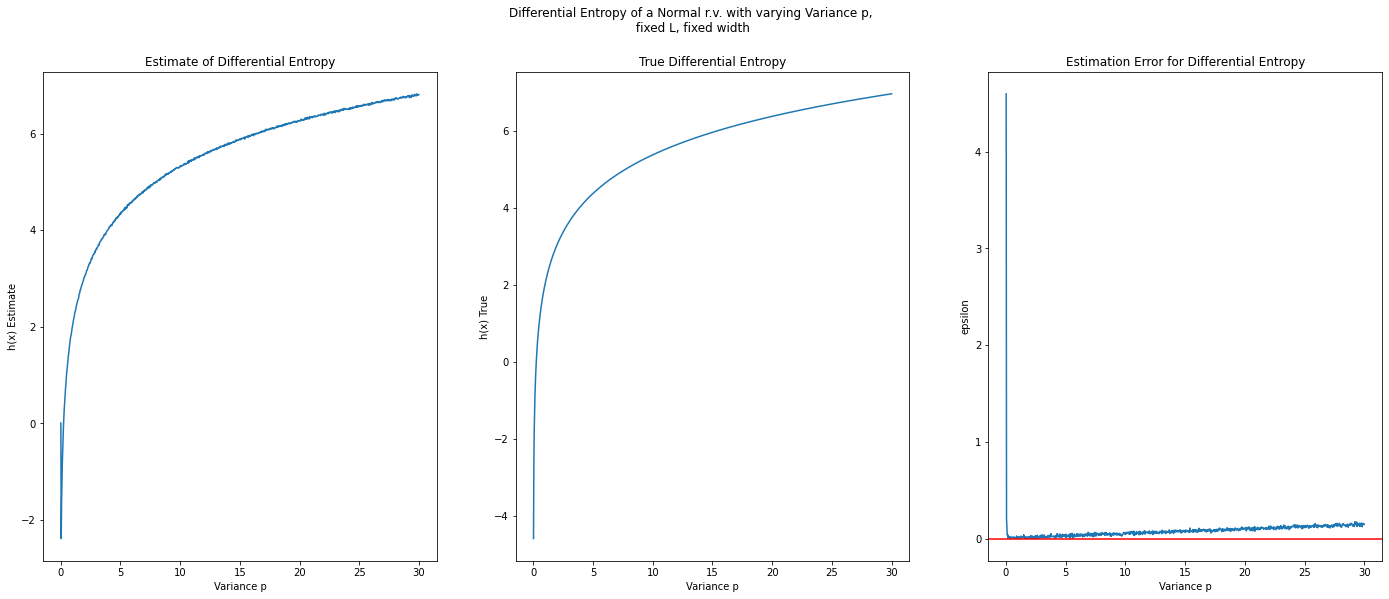

In [14]:
rv = 'Normal'
varying = 'Variance p'
fix1 = 'L'
fix2 = 'width'
p_grid = np.linspace(0.01,30,1000)
L = 10000
width = 0.1

hx_hat_list = []
hx_true = []
error = []

for p in p_grid: #####
    # Empirical Vector
    x = gen_norm(p, L) #####
    # Estimates
    estimate = diff_entropy(x, width, plot=False)
    hx_hat_list.append(estimate)
    #True
    true = true_diff_norm(p) #####
    hx_true.append(true)
    # Error
    error.append(np.absolute(estimate-true))
    
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}')
# Estimate
ax1.plot(p_grid, hx_hat_list) #####
ax1.set(xlabel=varying, ylabel='h(x) Estimate')
ax1.set_title('Estimate of Differential Entropy')
# True
ax2.plot(p_grid, hx_true) #####
ax2.set(xlabel=varying, ylabel='h(x) True')
ax2.set_title('True Differential Entropy')
# Error
ax3.plot(p_grid, error) #####
ax3.set(xlabel=varying, ylabel='epsilon')
ax3.set_title('Estimation Error for Differential Entropy')
ax3.axhline(y=0, color='r')

fig.set_figheight(9)
fig.set_figwidth(24)

### 2.2.2 Varying L

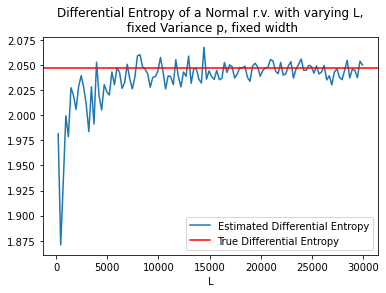

In [15]:
rv = 'Normal'
varying = 'L'
fix1 = 'Variance p'
fix2 = 'width'
L_grid = np.arange(200,30000,250)
p = 1
width = 0.1

hx_hat_list = []
hx_true = true_diff_norm(p) #####
error = []

for L in L_grid:
    # Empirical Vector
    x = gen_norm(p, L) #####
    # Estimates
    estimate = diff_entropy(x, width, plot=False)
    hx_hat_list.append(estimate)
    # Error
    error.append(np.absolute(estimate-hx_true))
    
plt.figure()
# Estimate vs True
title = f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}'
plt.title(title)
plt.plot(L_grid, hx_hat_list, label='Estimated Differential Entropy')
plt.axhline(y=hx_true, color='r', label='True Differential Entropy')
plt.xlabel(varying)
plt.legend()

### 2.2.3 Varying the width (and hence the number N of bins)

Text(0, 0.5, 'epsilon')

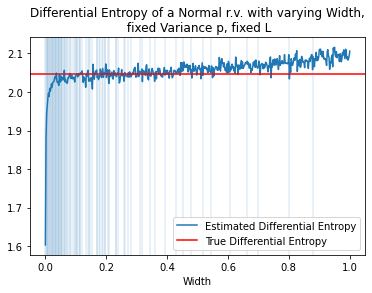

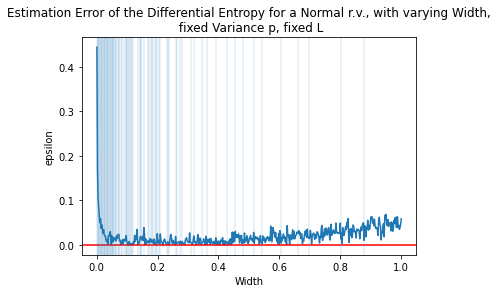

In [16]:
rv = 'Normal'
varying = 'Width'
fix1 = 'Variance p'
fix2 = 'L'
w_grid = np.linspace(0.001,1,500)
p = 1
L = 10000

hx_hat_list = []
hx_true = true_diff_norm(p)
temp = 10000
vlines = []
error = []

for width in w_grid:
    # Empirical Vector
    x = gen_norm(p, L) #####
    # Estimates
    estimate, bins = diff_entropy(x, width, plot=False, num_bins=True)
    if bins < temp:
        vlines.append(width)
        temp = bins
    hx_hat_list.append(estimate)
    # Error
    error.append(np.absolute(estimate-hx_true))
    
plt.figure()
# Estimate vs True
title = f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}'
plt.title(title)
plt.plot(w_grid, hx_hat_list, label='Estimated Differential Entropy')
plt.axhline(y=hx_true, color='r', label='True Differential Entropy')
for line in vlines:
    plt.axvline(x = line, linewidth=0.2)
plt.xlabel(varying)
plt.legend()

plt.figure()
title = f'Estimation Error of the Differential Entropy for a {rv} r.v., with varying {varying},\n fixed {fix1}, fixed {fix2}' 
plt.title(title)
plt.plot(w_grid, error)
plt.axhline(y = 0, color = 'r')
for line in vlines:
    plt.axvline(x = line, linewidth=0.2)
plt.xlabel(varying)
plt.ylabel('epsilon')

## 2.3 Exponential Distribution
### 2.3.1 Varying $\lambda$

<Figure size 432x288 with 0 Axes>

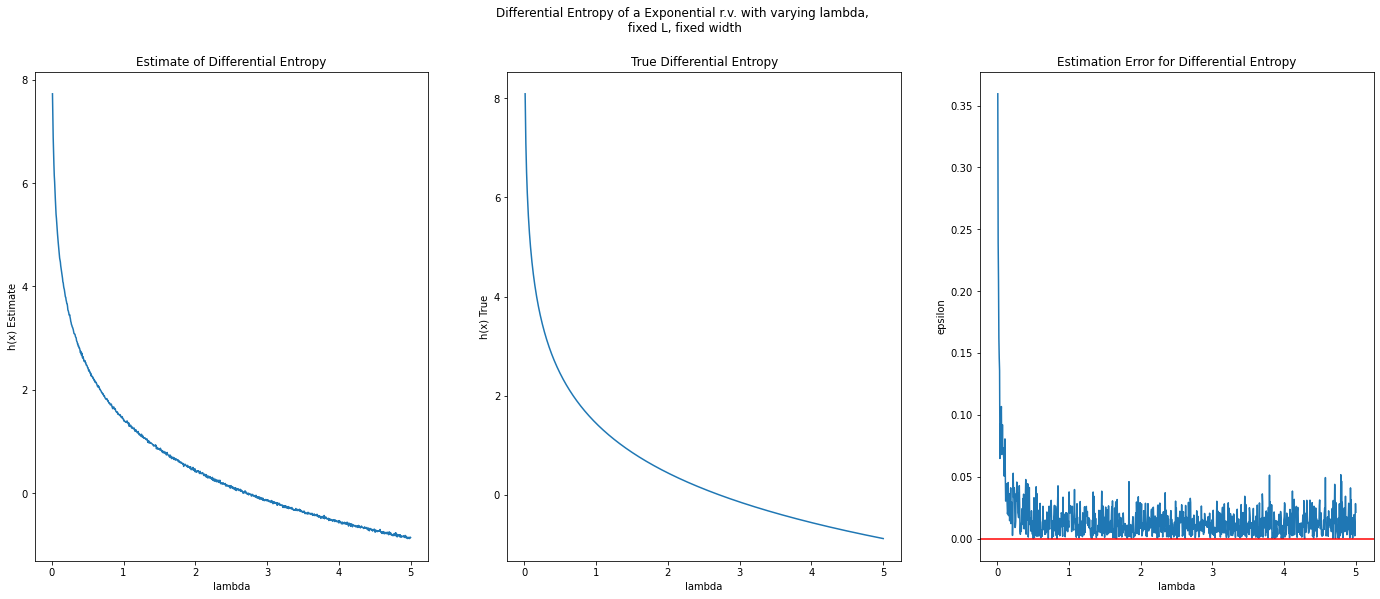

In [17]:
rv = 'Exponential'
varying = 'lambda'
fix1 = 'L'
fix2 = 'width'
lam_grid = np.linspace(0.01,5,1000)
L = 10000
width = 0.1

hx_hat_list = []
hx_true = []
error = []

for lam in lam_grid: #####
    # Empirical Vector
    x = gen_exp(lam, L) #####
    # Estimates
    estimate = diff_entropy(x, width, plot=False)
    hx_hat_list.append(estimate)
    #True
    true = true_diff_exp(lam) #####
    hx_true.append(true)
    # Error
    error.append(np.absolute(estimate-true))
    
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}')
# Estimate
ax1.plot(lam_grid, hx_hat_list) #####
ax1.set(xlabel=varying, ylabel='h(x) Estimate')
ax1.set_title('Estimate of Differential Entropy')
# True
ax2.plot(lam_grid, hx_true) #####
ax2.set(xlabel=varying, ylabel='h(x) True')
ax2.set_title('True Differential Entropy')
# Error
ax3.plot(lam_grid, error) #####
ax3.set(xlabel=varying, ylabel='epsilon')
ax3.set_title('Estimation Error for Differential Entropy')
ax3.axhline(y=0, color='r')

fig.set_figheight(9)
fig.set_figwidth(24)

## 2.3.2 Varying L

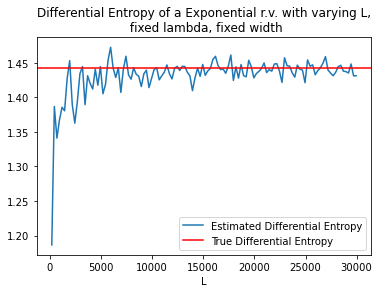

In [18]:
rv = 'Exponential'
varying = 'L'
fix1 = 'lambda'
fix2 = 'width'
L_grid = np.arange(200,30000,250)
lam = 1
width = 0.1

hx_hat_list = []
hx_true = true_diff_exp(lam) #####
error = []

for L in L_grid:
    # Empirical Vector
    x = gen_exp(lam, L) #####
    # Estimates
    estimate = diff_entropy(x, width, plot=False)
    hx_hat_list.append(estimate)
    # Error
    error.append(np.absolute(estimate-hx_true))
    
plt.figure()
# Estimate vs True
title = f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}'
plt.title(title)
plt.plot(L_grid, hx_hat_list, label='Estimated Differential Entropy')
plt.axhline(y=hx_true, color='r', label='True Differential Entropy')
plt.xlabel(varying)
plt.legend()

### 2.3.3 Varying the width (and hence the number N of bins)

Text(0, 0.5, 'epsilon')

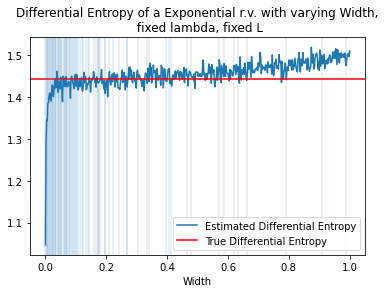

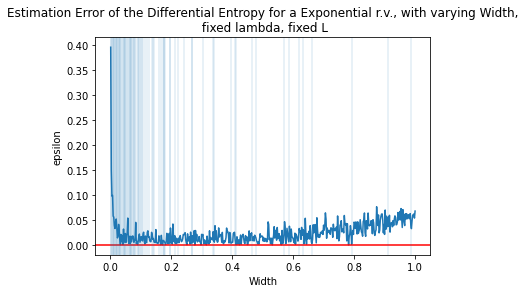

In [19]:
rv = 'Exponential'
varying = 'Width'
fix1 = 'lambda'
fix2 = 'L'
w_grid = np.linspace(0.001,1,500)
lam = 1
L = 10000

hx_hat_list = []
hx_true = true_diff_exp(lam) ####
temp = 10000
vlines = []
error = []

for width in w_grid:
    # Empirical Vector
    x = gen_exp(lam, L) #####
    # Estimates
    estimate, bins = diff_entropy(x, width, plot=False, num_bins=True)
    if bins < temp:
        vlines.append(width)
        temp = bins
    hx_hat_list.append(estimate)
    # Error
    error.append(np.absolute(estimate-hx_true))
    
plt.figure()
# Estimate vs True
title = f'Differential Entropy of a {rv} r.v. with varying {varying},\n fixed {fix1}, fixed {fix2}'
plt.title(title)
plt.plot(w_grid, hx_hat_list, label='Estimated Differential Entropy')
plt.axhline(y=hx_true, color='r', label='True Differential Entropy')
for line in vlines:
    plt.axvline(x = line, linewidth=0.2)
plt.xlabel(varying)
plt.legend()

plt.figure()
title = f'Estimation Error of the Differential Entropy for a {rv} r.v., with varying {varying},\n fixed {fix1}, fixed {fix2}' 
plt.title(title)
plt.plot(w_grid, error)
plt.axhline(y = 0, color = 'r')
for line in vlines:
    plt.axvline(x = line, linewidth=0.2)
plt.xlabel(varying)
plt.ylabel('epsilon')

# TODO 3: Joint Quantities

In [20]:
# def joint_pdf(x, y, width, return_marginals=False):
#     histx, _ = pdf(x, width)
#     histy, _ = pdf(y, width)
    
#     # Extract "joint" minimum and maximum
#     minimum = min(x.min(), y.min()) - width # +-width/2 is to avoid any problem for the extremes
#     maximum = max(x.max(), y.max()) + width
#     # "Joint" bin edges
#     bin_edges = np.arange(minimum, maximum, step=width).reshape((-1,))
    
#     # As we did in the discrete case, we need to detect every time 2 realizations x_i, y_i
#     # are (in this case) inside the same bin. Note this works only for "temporally"
#     # independent r.ve.s
#     dim = bin_edges.shape[0] - 1# dimension of pxy #####
#     pxy = np.zeros((dim, dim))
#     for i in range(x.shape[0]):
#         xi = x[i]
#         yi = y[i]
#         # Get the corresponding matrix indeces in pxy
#         indx = [n for n,sample in enumerate(bin_edges) if sample>=xi][0]
#         indy = [n for n,sample in enumerate(bin_edges) if sample>=yi][0]
#         pxy[indx-1,indy-1] = int(pxy[indx-1,indy-1]) + 1 #####
        
#     # Normalize
#     pxy = np.divide(pxy, x.shape[0]) #####
    
#     if return_marginals == True:
#         return pxy, histx, histy
#     return pxy

In [21]:
def joint_pdf(x, y, width, return_marginals=False, bins_count=False):
    histx, _ = pdf(x, width)
    histy, _ = pdf(y, width)
    
    xedges = np.arange(x.min(), x.max(), step=width)
    yedges = np.arange(y.min(), y.max(), step=width)
    
    x = x.reshape((-1,))
    y = y.reshape((-1,))
    
    hist_xy, xedges, yedges = np.histogram2d(x,y, bins=(xedges, yedges), density=True)
    
    if return_marginals == True:
        return histx, histy, hist_xy
    if bins_count == True:
        return hist_xy, len(xedges)-1, len(yedges)-1
    
    return hist_xy

In [22]:
test2 = np.random.normal(0,1, (L,1))
# pxy = joint_pdf(test,test2, 0.4)
# print('unique is', np.unique(pxy))
# plt.matshow(pxy)
# print('sum is', pxy.sum())

unique is [0.         0.00062513 0.00062513 0.00062513 0.00062513 0.00062513
 0.00062513 0.00062513 0.00125025 0.00125025 0.00125025 0.00125025
 0.00187538 0.00187538 0.00187538 0.00187538 0.0025005  0.0025005
 0.0025005  0.0025005  0.0025005  0.00312563 0.00312563 0.00312563
 0.00312563 0.00312563 0.00375075 0.00375075 0.00375075 0.00375075
 0.00437588 0.00437588 0.005001   0.005001   0.005001   0.00562613
 0.00562613 0.00562613 0.00625125 0.00625125 0.00625125 0.00625125
 0.00625125 0.00687638 0.00687638 0.00687638 0.0075015  0.0075015
 0.0075015  0.00812663 0.00875175 0.00875175 0.00937688 0.00937688
 0.00937688 0.010002   0.010002   0.010002   0.01062713 0.01062713
 0.01062713 0.01187738 0.01187738 0.01187738 0.0125025  0.0125025
 0.01312763 0.01437788 0.01437788 0.015003   0.015003   0.01562813
 0.01562813 0.01625325 0.01625325 0.01625325 0.01625325 0.01687838
 0.01687838 0.0175035  0.01812863 0.01937888 0.020004   0.02125425
 0.02187938 0.0225045  0.0225045  0.02312963 0.02312963

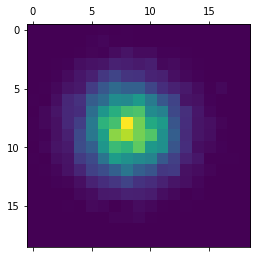

In [23]:
histxy = joint_pdf(test, test2, 0.4, return_marginals=False)
print('unique is', np.unique(histxy))
plt.matshow(histxy)
print('sum is', histxy.sum())

In [24]:
def joint_diff(x, y, width, bins_count=False):
    pxy, xbins, ybins = joint_pdf(x, y, width, bins_count=True)
    pxy = pxy.flatten()
    pxy = np.array(pxy[pxy != 0]) # Drop probs = 0, which would deform the result.
    ixy = np.log2(1/pxy)
    
    # Now the diff entropy is given as an inner product between px and diff_i
    hxy = np.inner(pxy, ixy) * width**2
    
    if bins_count==True:
        return hxy, xbins, ybins
    
    return hxy

In [25]:
hxy = joint_diff(test,test2,0.4)
print(diff_entropy(test, 0.4), diff_entropy(test2,0.4))
print(hxy)

2.0498130617028503 2.084216527559388
4.112179981484203


In [26]:
def cond_diff(x,y, width):
    hxy = joint_diff(x,y,width)
    hy = diff_entropy(y, width)
    hxy_cond = hxy - hy
    return hxy_cond

In [27]:
print('The conditional differential entropy CAN be negative')
print(cond_diff(test,test2, 0.4))

The conditional differential entropy CAN be negative
2.027963453924815


In [28]:
def relative_h(x,y,width):
    # Note that we must restrict the alphabet of y to the alphabet of x.
    # First of all we must set a common domain for x and y.
    minimum = min(x.min(), y.min())
    maximum = max(x.max(), y.max())
    # we now add minimum and maximum both to x and y. This doesn't change the statistics
    # but makes the r.ve.s have the same bin_edges
    x = np.append(x, [minimum, maximum])
    y = np.append(y, [minimum, maximum])
    #Now we can compute the pdfs
    px, _ = list(pdf(x,width))
    py, _ = list(pdf(y,width))
    # drop py where = 0 and the corresponding px
    non_zero = []
    for n, sample in enumerate(px):
        if sample != 0:
            non_zero.append(n)
    px = np.asarray(px[non_zero])
    py = np.asarray(py[non_zero])
    
    arg = np.divide(px, py) # argument of the log in the definition
    rel_h = np.inner(px, np.log2(arg))
    return rel_h

In [29]:
print(relative_h(test,test2,0.2))

inf


/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


In [30]:
def mutual_info(x,y,width):
    hx = diff_entropy(x, width)
    hy = diff_entropy(y, width)
    hxy = joint_diff(x,y,width)
    mut_info = hx + hy - hxy
    return mut_info

In [31]:
print(f' mut info is: {mutual_info(test,test,0.2)}')
print(diff_entropy(test,0.2))

 mut info is: 4.363533189131088
2.041605094243729


In [32]:
def estimate_values(x,y,width, bins_count=False):
    hxy, xbins, ybins = joint_diff(x,y,width, bins_count=True)
    h_cond = cond_diff(x,y,width)
    D = relative_h(x,y,width)
    I = mutual_info(x,y,width)
    
    if bins_count==True:
        return hxy, h_cond, D, I, xbins, ybins
    
    return hxy, h_cond, D, I

In [33]:
print(estimate_values(test,test2,0.2,bins_count=True))

(4.048203490098427, 1.9736317486371777, inf, 0.06797334560655166, 38, 39)


/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


# TODO 4: Tests on Multivariate

In [34]:
def gen_uniform_xy(A, L):
    x = np.random.uniform(1,A,(L,1))
    z = np.random.uniform(-1,1,(L,1))
    y = x+z
    return x,y

def gen_normal_xy(mu1, sigma1, mu2, sigma2, a, b, L):
    x = np.random.normal(mu1, sigma1, (L,1))
    z = np.random.normal(mu2, sigma2, (L,1))
    y = a*x + b*z
    return x, y

def true_uniform_xy(A, L=100000, width=0.1):
    '''
    This function must compute the true values for:
    + Differential Joint Entropy
    + Conditional Differential Entropy
    + Relative Entropy
    + Mutual Information
    '''
    # The diff entropy is computed on the empirical vectors to avoid difficult computations
    # Taking the "best params" (e.g. large L "small" width)
    x = np.random.uniform(1,A,(L,1))
    z = np.random.uniform(-1,1,(L,1))
    y = x+z
    
    hxy = joint_diff(x,y,width)
    hxy_cond = cond_diff(x,y, width)
    Dxy = relative_h(x,y,width)
    Ixy = mutual_info(x,y,width)    
    return hxy, hxy_cond, Dxy, Ixy

def true_normal_xy(mu1, sigma1, mu2, sigma2, a, b, L=100000, width=0.1):
    x,y = gen_normal_xy(mu1, sigma1, mu2, sigma2, a, b, L)
    
    hxy = joint_diff(x,y,width)
    hxy_cond = cond_diff(x,y, width)
    Dxy = relative_h(x,y,width)
    Ixy = mutual_info(x,y,width)    
    return hxy, hxy_cond, Dxy, Ixy

## 4.1 Uniform xy
### 4.1.1 Varying A

<Figure size 432x288 with 0 Axes>

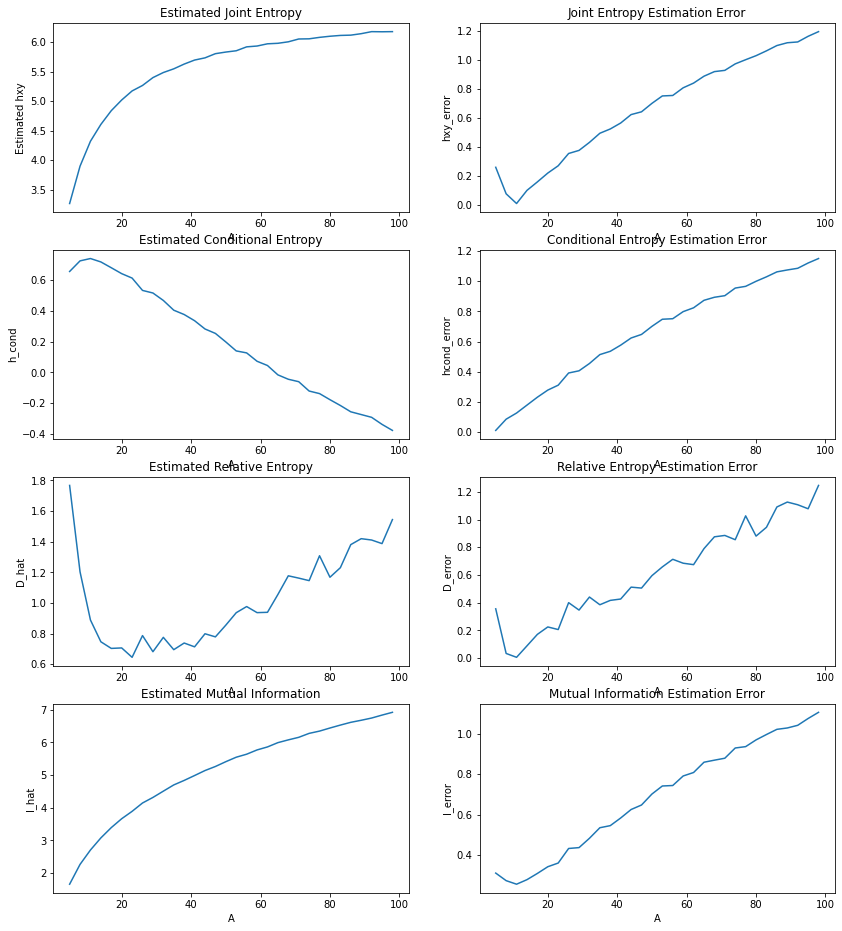

In [35]:
rv = 'Uniform x and y=x+z'
varying = 'A'
fix1 = 'L'
fix2 = 'width'
A_grid = np.arange(5,100,3)
L = 10000
width = 0.1

# Differential Entropy lists
hxy_hat = []
hxy_true = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_true = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_true = []
D_error = []
# Mutual Information Lists
I_hat = []
I_true = []
I_error = []

for A in A_grid: #####
    # Empirical Vector
    x = gen_uniform(A, L) #####
    z = np.random.uniform(-1,1,(L,1))
    y = x+z
    # Estimates values
    hxy_est, hcond_est, D_est, I_est = estimate_values(x,y,width)
    #"True" values
    hxy, hcond, D, I = true_uniform_xy(A, L=60000, width=0.1)
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # True lists: append values
    hxy_true.append(hxy)
    hcond_true.append(hcond)
    D_true.append(D)
    I_true.append(I)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Uniform and y=x+z')
## Differential Estimate
axs[0,0].plot(A_grid, hxy_hat)
axs[0,0].set(xlabel='A', ylabel='Estimated hxy')
axs[0,0].set_title('Estimated Joint Entropy')
## Differential Error
axs[0,1].plot(A_grid, hxy_error)
axs[0,1].set(xlabel='A', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
## Cond Estimate
axs[1,0].plot(A_grid, hcond_hat)
axs[1,0].set(xlabel='A', ylabel='h_cond')
axs[1,0].set_title('Estimated Conditional Entropy')
## Cond error
axs[1,1].plot(A_grid, hcond_error)
axs[1,1].set(xlabel='A', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
## Relative Estimate
axs[2,0].plot(A_grid, D_hat)
axs[2,0].set(xlabel='A', ylabel='D_hat')
axs[2,0].set_title('Estimated Relative Entropy')
## Relative Error
axs[2,1].plot(A_grid, D_error)
axs[2,1].set(xlabel='A', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
# Info Estimate
axs[3,0].plot(A_grid, I_hat)
axs[3,0].set(xlabel='A', ylabel='I_hat')
axs[3,0].set_title('Estimated Mutual Information')
# Info Error
axs[3,1].plot(A_grid, I_error)
axs[3,1].set(xlabel='A', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')

fig.set_figheight(16)
fig.set_figwidth(14)

### 4.1.2 Varying L

/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


<Figure size 432x288 with 0 Axes>

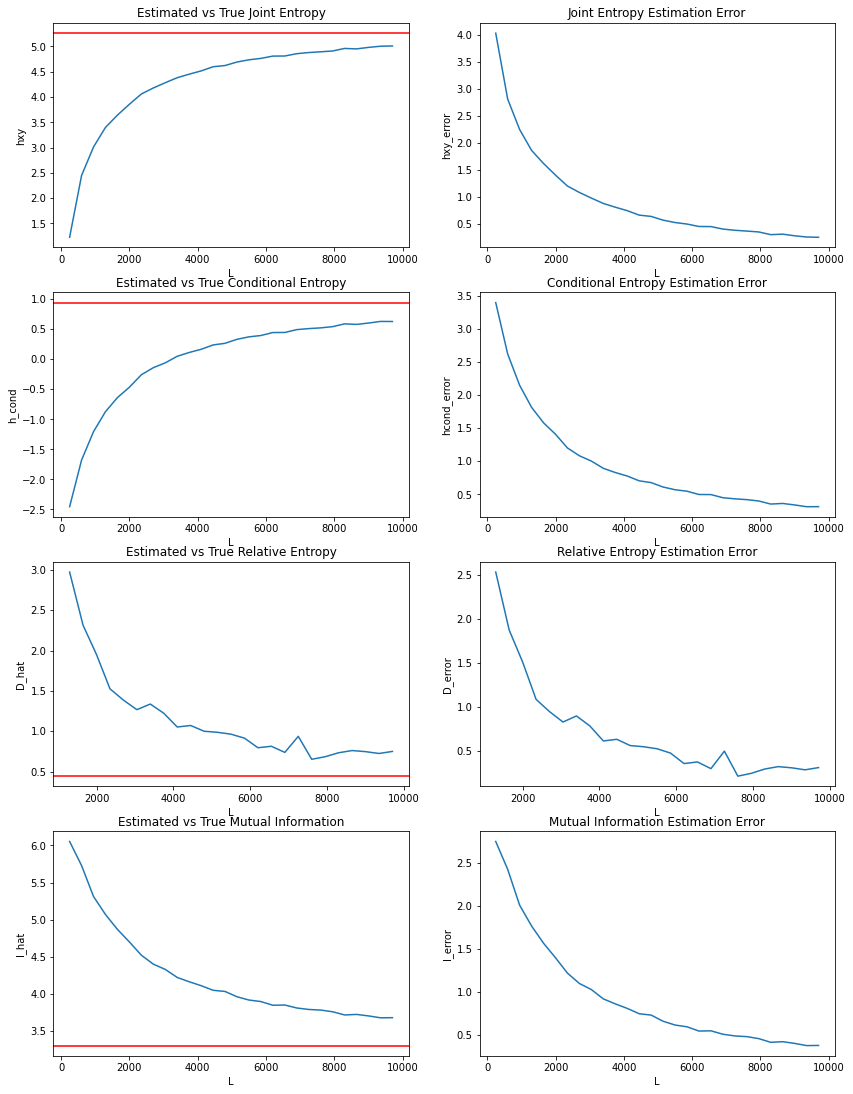

In [45]:
rv = 'Uniform x and y=x+z'
varying = 'L'
fix1 = 'A'
fix2 = 'width'
L_grid = np.arange(250,10000,350)
A = 20
width = 0.1

# True values (computed una tantum)
hxy, hcond, D, I = true_uniform_xy(A, L=100000, width=0.1)
# Differential Entropy lists
hxy_hat = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_error = []
# Mutual Information Lists
I_hat = []
I_error = []

for L in L_grid: #####
    # Empirical Vector
    x = gen_uniform(A, L) #####
    z = np.random.uniform(-1,1,(L,1))
    y = x+z
    # Estimates values
    hxy_est, hcond_est, D_est, I_est = estimate_values(x,y,width)
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Uniform and y=x+z')
## Differential Estimate
axs[0,0].plot(L_grid, hxy_hat)
axs[0,0].set(xlabel='L', ylabel='hxy')
axs[0,0].set_title('Estimated vs True Joint Entropy')
axs[0,0].axhline(y=hxy, c='r')
## Differential Error
axs[0,1].plot(L_grid, hxy_error)
axs[0,1].set(xlabel='L', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
## Cond Estimate
axs[1,0].plot(L_grid, hcond_hat)
axs[1,0].set(xlabel='L', ylabel='h_cond')
axs[1,0].set_title('Estimated vs True Conditional Entropy')
axs[1,0].axhline(y=hcond, c='r')
## Cond error
axs[1,1].plot(L_grid, hcond_error)
axs[1,1].set(xlabel='L', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
## Relative Estimate
axs[2,0].plot(L_grid, D_hat)
axs[2,0].set(xlabel='L', ylabel='D_hat')
axs[2,0].set_title('Estimated vs True Relative Entropy')
axs[2,0].axhline(y=D, c='r')
## Relative Error
axs[2,1].plot(L_grid, D_error)
axs[2,1].set(xlabel='L', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
# Info Estimate
axs[3,0].plot(L_grid, I_hat)
axs[3,0].set(xlabel='L', ylabel='I_hat')
axs[3,0].set_title('Estimated vs True Mutual Information')
axs[3,0].axhline(y=I, c='r')
# Info Error
axs[3,1].plot(L_grid, I_error)
axs[3,1].set(xlabel='L', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')

fig.set_figheight(19)
fig.set_figwidth(14)

### 4.1.2 Varying the width and hence the numbers of bins

/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


<Figure size 432x288 with 0 Axes>

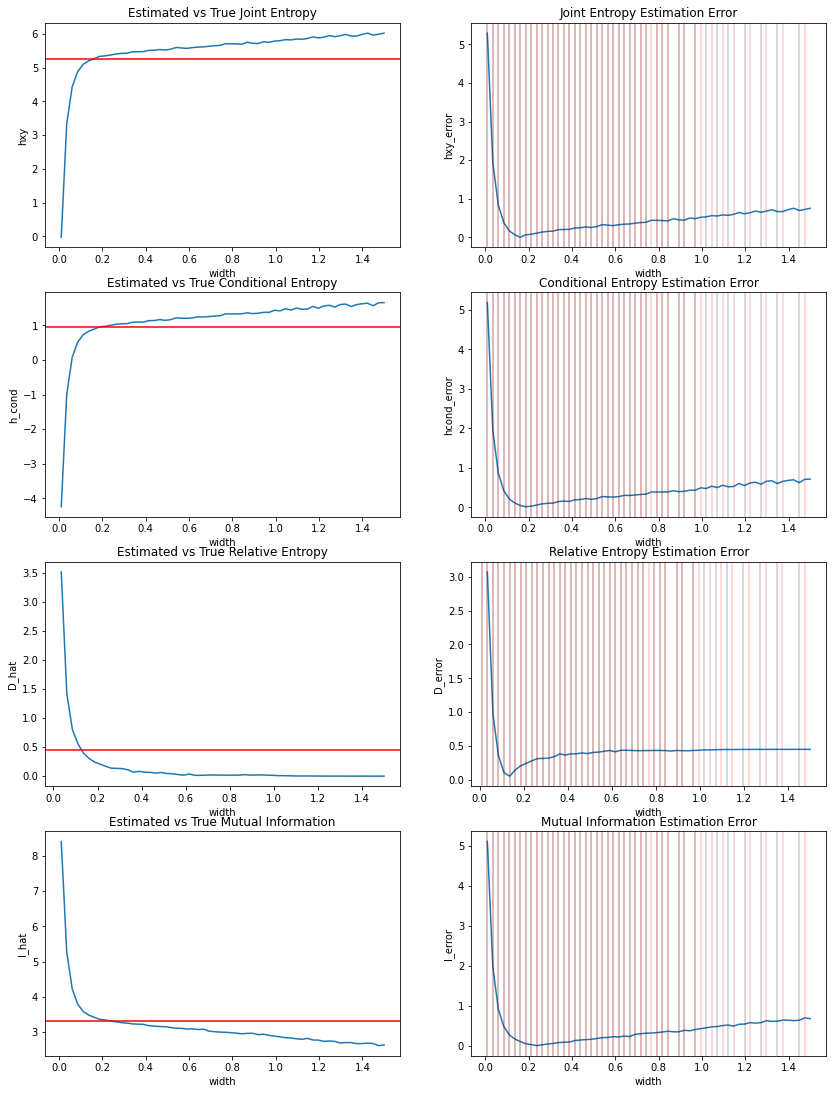

In [46]:
rv = 'Uniform x and y=x+z'
varying = 'width'
fix1 = 'L'
fix2 = 'A'
w_grid = np.linspace(0.01,1.5,60)
A = 20
L = 10000

# True values (computed una tantum)
hxy, hcond, D, I = true_uniform_xy(A, L=100000, width=0.1)
# Differential Entropy lists
hxy_hat = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_error = []
# Mutual Information Lists
I_hat = []
I_error = []

# Empirical Vector
x = gen_uniform(A, L) #####
z = np.random.uniform(-1,1,(L,1))
y = x+z

# Vertical lines to indicate change in bins' number
tempx = 10000
tempy = 10000
vxlines = []
vylines = []

for width in w_grid: #####
    # Estimates values
    hxy_est, hcond_est, D_est, I_est, xbins, ybins = estimate_values(x,y,width, bins_count=True)
    
    
    if xbins < tempx:
        vxlines.append(width)
        tempx = xbins
    if ybins < tempy:
        vylines.append(width)
        tempy = ybins
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Uniform and y=x+z')
## Differential Estimate
axs[0,0].plot(w_grid, hxy_hat)
axs[0,0].set(xlabel='width', ylabel='hxy')
axs[0,0].set_title('Estimated vs True Joint Entropy')
axs[0,0].axhline(y=hxy, c='r')
## Differential Error
axs[0,1].plot(w_grid, hxy_error)
axs[0,1].set(xlabel='width', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
for line in vxlines:
    axs[0,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[0,1].axvline(x = line, linewidth=0.3, c='r')
## Cond Estimate
axs[1,0].plot(w_grid, hcond_hat)
axs[1,0].set(xlabel='width', ylabel='h_cond')
axs[1,0].set_title('Estimated vs True Conditional Entropy')
axs[1,0].axhline(y=hcond, c='r')
## Cond error
axs[1,1].plot(w_grid, hcond_error)
axs[1,1].set(xlabel='width', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
for line in vxlines:
    axs[1,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[1,1].axvline(x = line, linewidth=0.3, c='r')
## Relative Estimate
axs[2,0].plot(w_grid, D_hat)
axs[2,0].set(xlabel='width', ylabel='D_hat')
axs[2,0].set_title('Estimated vs True Relative Entropy')
axs[2,0].axhline(y=D, c='r')
## Relative Error
axs[2,1].plot(w_grid, D_error)
axs[2,1].set(xlabel='width', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
for line in vxlines:
    axs[2,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[2,1].axvline(x = line, linewidth=0.3, c='r')
# Info Estimate
axs[3,0].plot(w_grid, I_hat)
axs[3,0].set(xlabel='width', ylabel='I_hat')
axs[3,0].set_title('Estimated vs True Mutual Information')
axs[3,0].axhline(y=I, c='r')
# Info Error
axs[3,1].plot(w_grid, I_error)
axs[3,1].set(xlabel='width', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')
for line in vxlines:
    axs[3,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[3,1].axvline(x = line, linewidth=0.3, c='r')

fig.set_figheight(19)
fig.set_figwidth(14)

## 4.2 Gaussian x and y=x+z
### 4.2.1 Varying $m_x$ and then $\sigma_x^2$
Note that we don't need to vary also the parameter of $z$ since the 2 distribution are interchangeable.

/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


<Figure size 432x288 with 0 Axes>

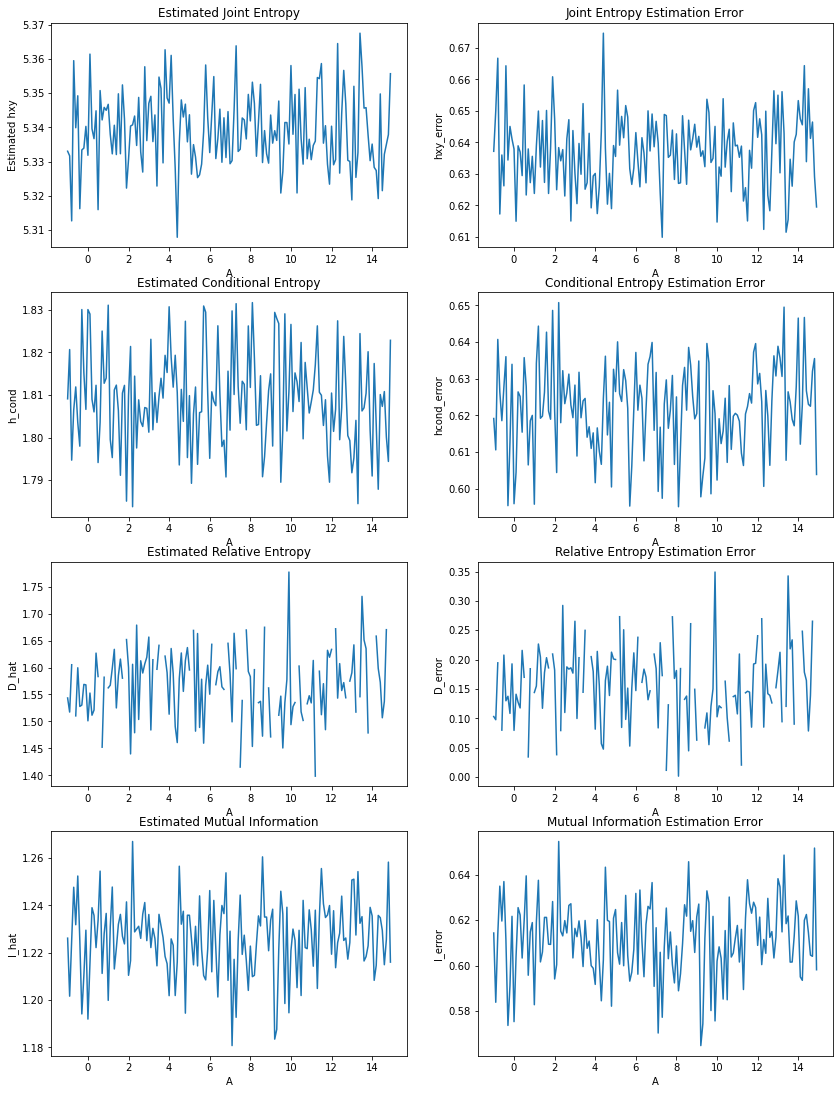

In [47]:
rv = 'Gaussian x and y=x+z'
varying = 'mx'
fix1 = 'L'
fix2 = 'width'
A_grid = np.arange(-1,15,0.1) #let's keep A as parameter to avoid useless changes to the code
L = 10000
width = 0.1
mz = 0
sigmaz_sq = 1
sigmax_sq = 2
a = 1
b = 2

# Differential Entropy lists
hxy_hat = []
hxy_true = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_true = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_true = []
D_error = []
# Mutual Information Lists
I_hat = []
I_true = []
I_error = []

for A in A_grid: #####
    # Empirical Vector
    x, y = gen_normal_xy(A, sigmax_sq, mz, sigmaz_sq, a, b, L) #####
    # Estimates values
    hxy_est, hcond_est, D_est, I_est = estimate_values(x,y,width)
    #"True" values
    hxy, hcond, D, I = true_normal_xy(A, sigmax_sq, mz, sigmaz_sq, a, b, L=100000, width=0.1)
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # True lists: append values
    hxy_true.append(hxy)
    hcond_true.append(hcond)
    D_true.append(D)
    I_true.append(I)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Normal and y=x+z')
## Differential Estimate
axs[0,0].plot(A_grid, hxy_hat)
axs[0,0].set(xlabel='A', ylabel='Estimated hxy')
axs[0,0].set_title('Estimated Joint Entropy')
## Differential Error
axs[0,1].plot(A_grid, hxy_error)
axs[0,1].set(xlabel='A', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
## Cond Estimate
axs[1,0].plot(A_grid, hcond_hat)
axs[1,0].set(xlabel='A', ylabel='h_cond')
axs[1,0].set_title('Estimated Conditional Entropy')
## Cond error
axs[1,1].plot(A_grid, hcond_error)
axs[1,1].set(xlabel='A', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
## Relative Estimate
axs[2,0].plot(A_grid, D_hat)
axs[2,0].set(xlabel='A', ylabel='D_hat')
axs[2,0].set_title('Estimated Relative Entropy')
## Relative Error
axs[2,1].plot(A_grid, D_error)
axs[2,1].set(xlabel='A', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
# Info Estimate
axs[3,0].plot(A_grid, I_hat)
axs[3,0].set(xlabel='A', ylabel='I_hat')
axs[3,0].set_title('Estimated Mutual Information')
# Info Error
axs[3,1].plot(A_grid, I_error)
axs[3,1].set(xlabel='A', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')

fig.set_figheight(19)
fig.set_figwidth(14)

Note that changing $m_x$ doesn't change the joint diff entropy (don't be fooled by the irregular pattern: it's just oscillation).

This is intuitive since an horizontal translation of 1 of the 2 gaussians doesn't change its joint properties.

/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition
/tmp/ipykernel_7827/3623149093.py:52: RuntimeWarning: invalid value encountered in double_scalars
  D_error.append(np.absolute(D_est - D))


<Figure size 432x288 with 0 Axes>

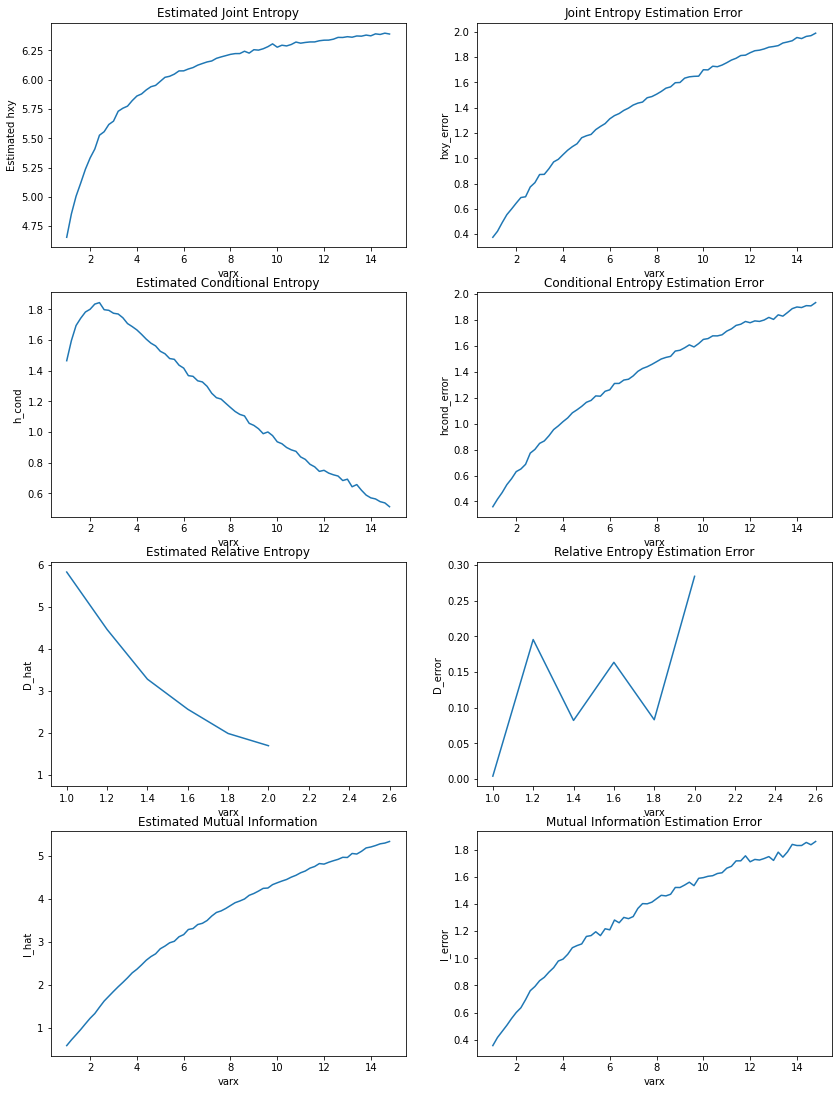

In [49]:
rv = 'Gaussian x and y=x+z'
varying = 'sigmax_sq'
fix1 = 'L'
fix2 = 'width'
A_grid = np.arange(1,15,0.2) #let's keep A as parameter to avoid useless changes to the code
L = 10000
width = 0.1
mz = 0
sigmaz_sq = 1
mx = 3
a = 1
b = 2

# Differential Entropy lists
hxy_hat = []
hxy_true = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_true = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_true = []
D_error = []
# Mutual Information Lists
I_hat = []
I_true = []
I_error = []

for A in A_grid: #####
    # Empirical Vector
    x, y = gen_normal_xy(mx, A, mz, sigmaz_sq, a, b, L) #####
    # Estimates values
    hxy_est, hcond_est, D_est, I_est = estimate_values(x,y,width)
    #"True" values
    hxy, hcond, D, I = true_normal_xy(mx, A, mz, sigmaz_sq, a, b, L=100000, width=0.1)
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # True lists: append values
    hxy_true.append(hxy)
    hcond_true.append(hcond)
    D_true.append(D)
    I_true.append(I)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Normal and y=x+z')
## Differential Estimate
axs[0,0].plot(A_grid, hxy_hat)
axs[0,0].set(xlabel='varx', ylabel='Estimated hxy')
axs[0,0].set_title('Estimated Joint Entropy')
## Differential Error
axs[0,1].plot(A_grid, hxy_error)
axs[0,1].set(xlabel='varx', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
## Cond Estimate
axs[1,0].plot(A_grid, hcond_hat)
axs[1,0].set(xlabel='varx', ylabel='h_cond')
axs[1,0].set_title('Estimated Conditional Entropy')
## Cond error
axs[1,1].plot(A_grid, hcond_error)
axs[1,1].set(xlabel='varx', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
## Relative Estimate
axs[2,0].plot(A_grid, D_hat)
axs[2,0].set(xlabel='varx', ylabel='D_hat')
axs[2,0].set_title('Estimated Relative Entropy')
## Relative Error
axs[2,1].plot(A_grid, D_error)
axs[2,1].set(xlabel='varx', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
# Info Estimate
axs[3,0].plot(A_grid, I_hat)
axs[3,0].set(xlabel='varx', ylabel='I_hat')
axs[3,0].set_title('Estimated Mutual Information')
# Info Error
axs[3,1].plot(A_grid, I_error)
axs[3,1].set(xlabel='varx', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')

fig.set_figheight(19)
fig.set_figwidth(14)

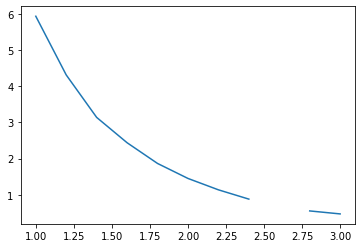

In [40]:
# Zoom on the relative entropy behaviour
plt.plot(A_grid, D_true)

### 4.2.2 Varying 1 of the 2 coeffs a, b

/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition
/tmp/ipykernel_7827/2830899288.py:52: RuntimeWarning: invalid value encountered in double_scalars
  D_error.append(np.absolute(D_est - D))


<Figure size 432x288 with 0 Axes>

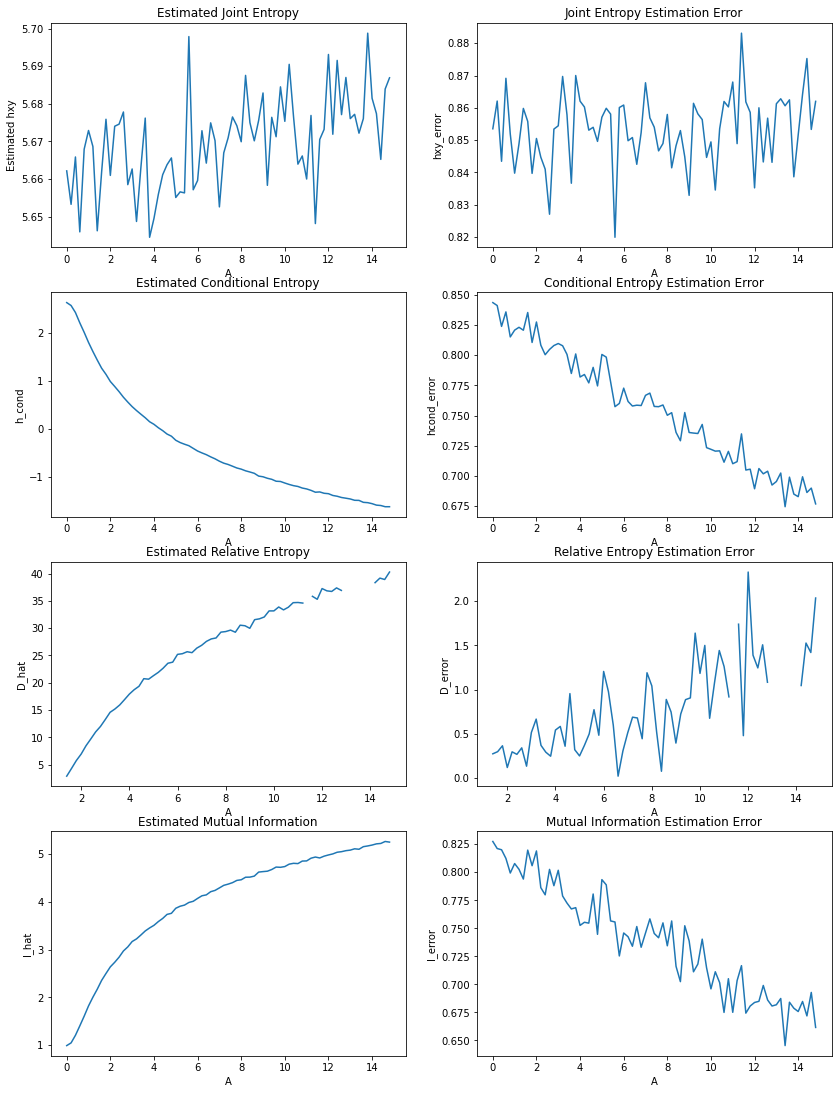

In [50]:
rv = 'Gaussian x and y=x+z'
varying = 'a'
fix1 = 'L'
fix2 = 'width'
A_grid = np.arange(0,15,0.2) #let's keep A=a as parameter to avoid useless changes to the code
L = 10000
width = 0.1
mz = 0
sigmaz_sq = 1
sigmax_sq = 3
mx = 3
b = 2

# Differential Entropy lists
hxy_hat = []
hxy_true = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_true = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_true = []
D_error = []
# Mutual Information Lists
I_hat = []
I_true = []
I_error = []

for A in A_grid: #####
    # Empirical Vector
    x, y = gen_normal_xy(mx, sigmax_sq, mz, sigmaz_sq, A, b, L) #####
    # Estimates values
    hxy_est, hcond_est, D_est, I_est = estimate_values(x,y,width)
    #"True" values
    hxy, hcond, D, I = true_normal_xy(mx, sigmax_sq, mz, sigmaz_sq, A, b, L=100000, width=0.1)
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # True lists: append values
    hxy_true.append(hxy)
    hcond_true.append(hcond)
    D_true.append(D)
    I_true.append(I)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Normal and y=x+z')
## Differential Estimate
axs[0,0].plot(A_grid, hxy_hat)
axs[0,0].set(xlabel='A', ylabel='Estimated hxy')
axs[0,0].set_title('Estimated Joint Entropy')
## Differential Error
axs[0,1].plot(A_grid, hxy_error)
axs[0,1].set(xlabel='A', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
## Cond Estimate
axs[1,0].plot(A_grid, hcond_hat)
axs[1,0].set(xlabel='A', ylabel='h_cond')
axs[1,0].set_title('Estimated Conditional Entropy')
## Cond error
axs[1,1].plot(A_grid, hcond_error)
axs[1,1].set(xlabel='A', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
## Relative Estimate
axs[2,0].plot(A_grid, D_hat)
axs[2,0].set(xlabel='A', ylabel='D_hat')
axs[2,0].set_title('Estimated Relative Entropy')
## Relative Error
axs[2,1].plot(A_grid, D_error)
axs[2,1].set(xlabel='A', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
# Info Estimate
axs[3,0].plot(A_grid, I_hat)
axs[3,0].set(xlabel='A', ylabel='I_hat')
axs[3,0].set_title('Estimated Mutual Information')
# Info Error
axs[3,1].plot(A_grid, I_error)
axs[3,1].set(xlabel='A', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')

fig.set_figheight(19)
fig.set_figwidth(14)

Note that the result on mutual info derives from the fact that:
$$I(x;y) = h(x) + h(y) - h(x;y)$$
and that:
$$h(ax) = h(x) + \log_2 |a|$$

### 4.2.3 Varying L

/tmp/ipykernel_7827/2119166925.py:21: RuntimeWarning: divide by zero encountered in true_divide
  arg = np.divide(px, py) # argument of the log in the definition


<Figure size 432x288 with 0 Axes>

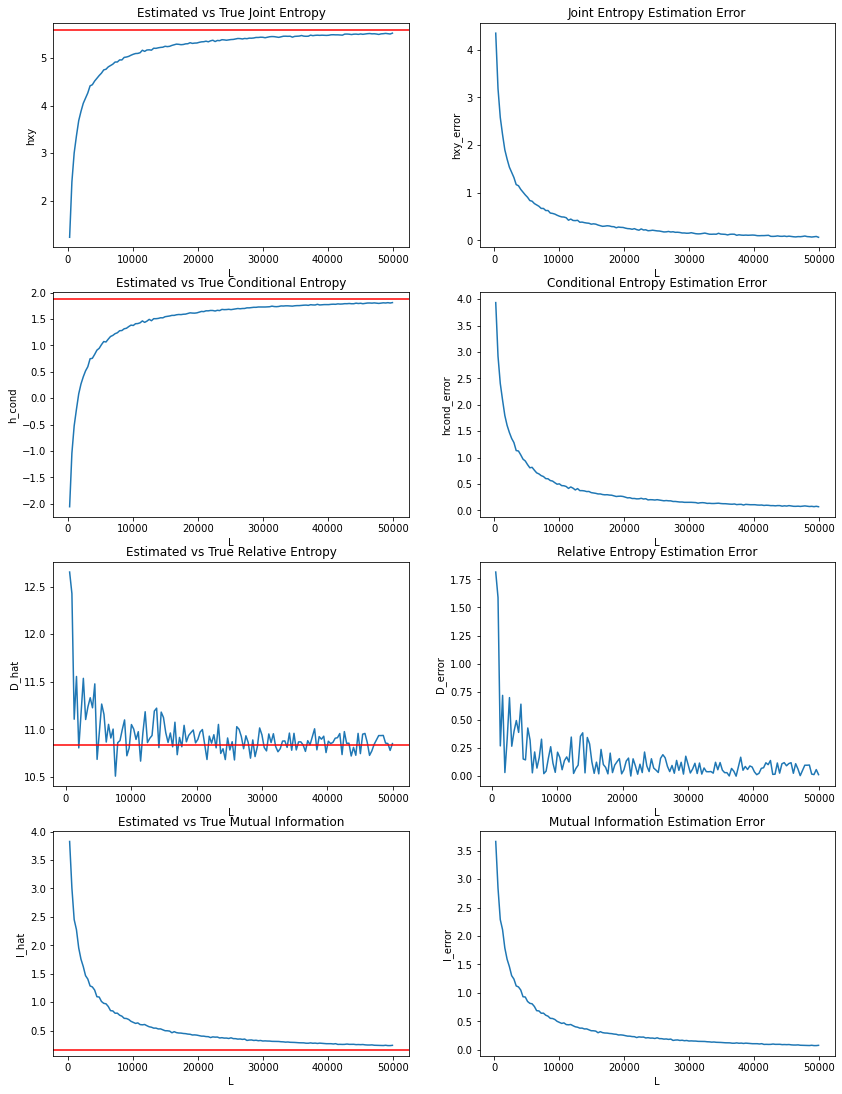

In [51]:
rv = 'Gaussian x and y=x+z'
varying = 'L'
fix1 = 'mx, mz, sigmax_sq, sigmaz_sq'
fix2 = 'width'
L_grid = np.arange(250,50000,350)
mx, mz = 0,1
sigmax_sq, sigmaz_sq = 1,3
a,b=1,1
width = 0.1

# True values (computed una tantum)
hxy, hcond, D, I = true_normal_xy(mx,sigmax_sq, mz, sigmaz_sq, a, b, L=100000, width=0.1)
# Differential Entropy lists
hxy_hat = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_error = []
# Mutual Information Lists
I_hat = []
I_error = []

for L in L_grid: #####
    # Empirical Vector
    x, y = gen_normal_xy(mx, sigmax_sq, mz, sigmaz_sq, a, b, L)
    # Estimates values
    hxy_est, hcond_est, D_est, I_est = estimate_values(x,y,width)
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Gaussian and y=x+z')
## Differential Estimate
axs[0,0].plot(L_grid, hxy_hat)
axs[0,0].set(xlabel='L', ylabel='hxy')
axs[0,0].set_title('Estimated vs True Joint Entropy')
axs[0,0].axhline(y=hxy, c='r')
## Differential Error
axs[0,1].plot(L_grid, hxy_error)
axs[0,1].set(xlabel='L', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
## Cond Estimate
axs[1,0].plot(L_grid, hcond_hat)
axs[1,0].set(xlabel='L', ylabel='h_cond')
axs[1,0].set_title('Estimated vs True Conditional Entropy')
axs[1,0].axhline(y=hcond, c='r')
## Cond error
axs[1,1].plot(L_grid, hcond_error)
axs[1,1].set(xlabel='L', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
## Relative Estimate
axs[2,0].plot(L_grid, D_hat)
axs[2,0].set(xlabel='L', ylabel='D_hat')
axs[2,0].set_title('Estimated vs True Relative Entropy')
axs[2,0].axhline(y=D, c='r')
## Relative Error
axs[2,1].plot(L_grid, D_error)
axs[2,1].set(xlabel='L', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
# Info Estimate
axs[3,0].plot(L_grid, I_hat)
axs[3,0].set(xlabel='L', ylabel='I_hat')
axs[3,0].set_title('Estimated vs True Mutual Information')
axs[3,0].axhline(y=I, c='r')
# Info Error
axs[3,1].plot(L_grid, I_error)
axs[3,1].set(xlabel='L', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')

fig.set_figheight(19)
fig.set_figwidth(14)

### 4.2.4 Varying the width and therefore the number of bins

D is: 3.634412761854737


<Figure size 432x288 with 0 Axes>

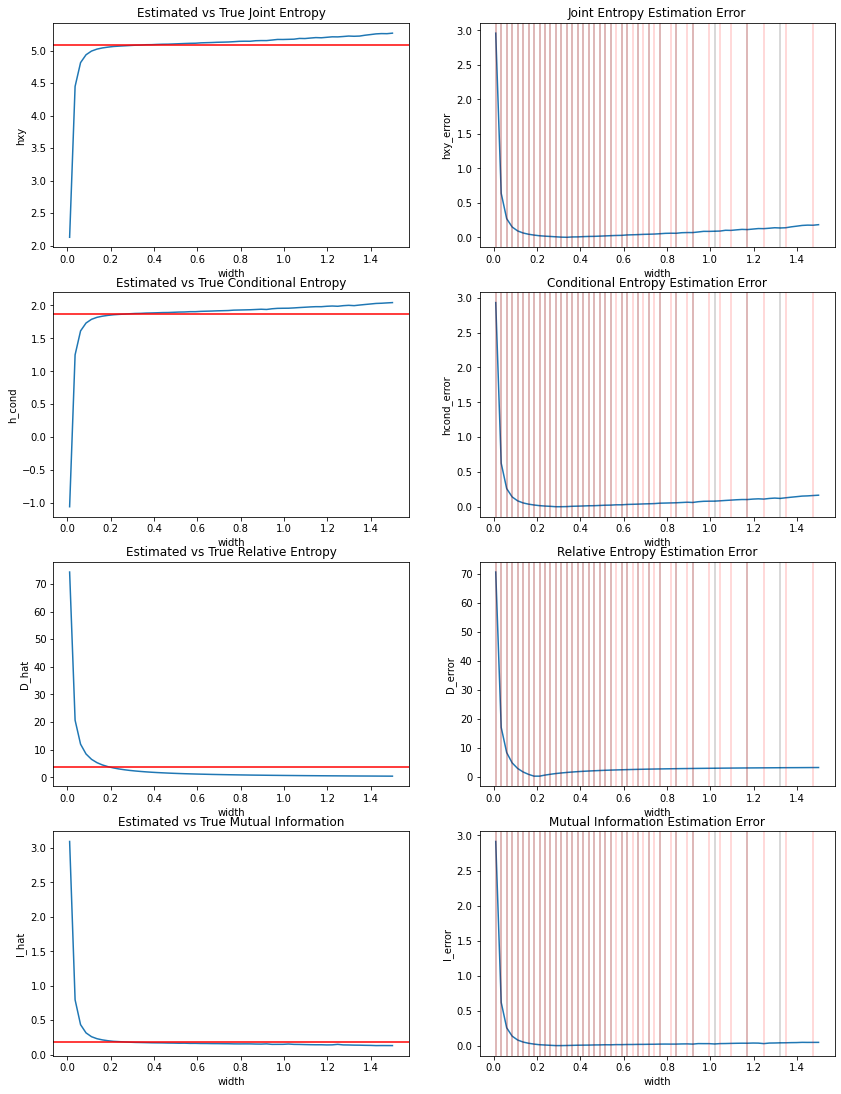

In [52]:
rv = 'Uniform x and y=x+z'
varying = 'width'
fix1 = 'L'
fix2 = 'A'
w_grid = np.linspace(0.01,1.5,60)
mx, mz = 0,1
sigmax_sq, sigmaz_sq = 1,2
a,b=1,1
L = 50000

# True values (computed una tantum)
hxy, hcond, D, I = true_normal_xy(mx,sigmax_sq, mz, sigmaz_sq, a, b, L=100000, width=0.2)
print(f'D is: {D}')
# Differential Entropy lists
hxy_hat = []
hxy_error = []
# Conditional Entropy lists
hcond_hat = []
hcond_error = []
# Relative Entropy Lists
D_hat = []
D_error = []
# Mutual Information Lists
I_hat = []
I_error = []

# Empirical Vector
x,y = gen_normal_xy(mx, sigmax_sq, mz, sigmaz_sq, a, b, L)

# Vertical lines to indicate change in bins' number
tempx = 10000
tempy = 10000
vxlines = []
vylines = []

for width in w_grid: #####
    # Estimates values
    hxy_est, hcond_est, D_est, I_est, xbins, ybins = estimate_values(x,y,width, bins_count=True)

    
    if xbins < tempx:
        vxlines.append(width)
        tempx = xbins
    if ybins < tempy:
        vylines.append(width)
        tempy = ybins
    
    #Estimate lists: append values
    hxy_hat.append(hxy_est)
    hcond_hat.append(hcond_est)
    D_hat.append(D_est)
    I_hat.append(I_est)
    # Errors lists: append values
    hxy_error.append(np.absolute(hxy_est - hxy))
    hcond_error.append(np.absolute(hcond_est - hcond))
    D_error.append(np.absolute(D_est - D))
    I_error.append(np.absolute(I_est - I))
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
# fig.suptitle(f'x Gaussian and y=x+z')
## Differential Estimate
axs[0,0].plot(w_grid, hxy_hat)
axs[0,0].set(xlabel='width', ylabel='hxy')
axs[0,0].set_title('Estimated vs True Joint Entropy')
axs[0,0].axhline(y=hxy, c='r')
## Differential Error
axs[0,1].plot(w_grid, hxy_error)
axs[0,1].set(xlabel='width', ylabel='hxy_error')
axs[0,1].set_title('Joint Entropy Estimation Error')
for line in vxlines:
    axs[0,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[0,1].axvline(x = line, linewidth=0.3, c='r')
## Cond Estimate
axs[1,0].plot(w_grid, hcond_hat)
axs[1,0].set(xlabel='width', ylabel='h_cond')
axs[1,0].set_title('Estimated vs True Conditional Entropy')
axs[1,0].axhline(y=hcond, c='r')
## Cond error
axs[1,1].plot(w_grid, hcond_error)
axs[1,1].set(xlabel='width', ylabel='hcond_error')
axs[1,1].set_title('Conditional Entropy Estimation Error')
for line in vxlines:
    axs[1,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[1,1].axvline(x = line, linewidth=0.3, c='r')
## Relative Estimate
axs[2,0].plot(w_grid, D_hat)
axs[2,0].set(xlabel='width', ylabel='D_hat')
axs[2,0].set_title('Estimated vs True Relative Entropy')
axs[2,0].axhline(y=D, c='r')
## Relative Error
# axs[2,1].axis('off')
axs[2,1].plot(w_grid, D_error)
axs[2,1].set(xlabel='width', ylabel='D_error')
axs[2,1].set_title('Relative Entropy Estimation Error')
for line in vxlines:
    axs[2,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[2,1].axvline(x = line, linewidth=0.3, c='r')
# Info Estimate
axs[3,0].plot(w_grid, I_hat)
axs[3,0].set(xlabel='width', ylabel='I_hat')
axs[3,0].set_title('Estimated vs True Mutual Information')
axs[3,0].axhline(y=I, c='r')
# Info Error
axs[3,1].plot(w_grid, I_error)
axs[3,1].set(xlabel='width', ylabel='I_error')
axs[3,1].set_title('Mutual Information Estimation Error')
for line in vxlines:
    axs[3,1].axvline(x = line, linewidth=0.3, c='k')
for line in vylines:
    axs[3,1].axvline(x = line, linewidth=0.3, c='r')

fig.set_figheight(19)
fig.set_figwidth(14)